In [1]:
import requests
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
statuses = ['confirmed', 'deaths', 'recovered']
covid_df = pd.DataFrame()
temp_df = pd.DataFrame()
for status in statuses:
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{status}_global.csv"
    r = requests.get(url)
    with open(f'{status}.csv', 'wb') as f:
        f.write(r.content)
    print(f"{status}: {r.status_code}, {r.headers['content-type']}, {r.encoding}")
    temp_df = pd.read_csv(f"{status}.csv")
    temp_df['status'] = status
    covid_df = pd.concat([temp_df,covid_df])

confirmed: 200, text/plain; charset=utf-8, utf-8
deaths: 200, text/plain; charset=utf-8, utf-8
recovered: 200, text/plain; charset=utf-8, utf-8


In [3]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,status
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,recovered
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,recovered
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,recovered
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,recovered
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,recovered


In [4]:
filtered_df = covid_df[covid_df['Province/State']=='Alberta']

In [5]:
filtered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,status
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,2,3,8,9,13,13,18,20,23,deaths
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,621,661,690,754,969,969,1075,1181,1250,confirmed


In [6]:
temp_df = pd.DataFrame()
data_df = pd.DataFrame()
for status in filtered_df.status.unique():
    target_df = filtered_df[filtered_df['status'] == status]
    temp_df['datetime'] = pd.to_datetime(pd.Series(target_df.columns[4:-1]), format='%m/%d/%y')
    temp_df['status'] = status
    temp_df['cases'] = target_df.values[0][4:-1].astype(int)
    data_df = pd.concat([temp_df,data_df])

In [7]:
data_df.info()
data_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 75
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  152 non-null    datetime64[ns]
 1   status    152 non-null    object        
 2   cases     152 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.8+ KB


,datetime,status,cases
0,2020-01-22,confirmed,0
1,2020-01-23,confirmed,0
2,2020-01-24,confirmed,0
3,2020-01-25,confirmed,0
4,2020-01-26,confirmed,0


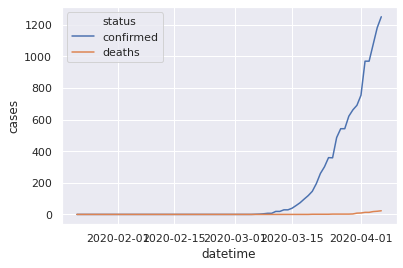

In [8]:
ax = sns.lineplot(x='datetime',y='cases',hue='status',data=data_df)